In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
%matplotlib inline

In [72]:
class ValueTooSmallError(Exception):
    pass

while True:
    k = int(input("ENTER A NUMBER: "))
    if(k < 1):
        raise ValueTooSmallError("VALUE IS TO SMALL, PROVIDE POSITIVE INTEGER")
    break

ENTER A NUMBER: 3


In [74]:
def generate_random_points(min_x, max_x, min_y, max_y, points_count):
    color = ['r', 'g', 'b', 'k']
    x = np.random.randint(min_x, max_x, points_count)
    y = np.random.randint(min_y, max_y, points_count)
    color = np.random.choice(list(['r', 'g', 'b', 'k']), 300)
    points = pd.DataFrame({
        'x': x,
        'y': y,
        'color': color
    })
    return points

In [75]:
def KNN(points, k):
    distance_cols = []
    for point in points.iloc:
        if point['color'] != 'k':
            continue
        distance = pd.DataFrame(np.sqrt((points['x'] - point['x']) ** 2 + (points['y'] - point['y']) ** 2))
        distance.insert(1, 'color', points['color'])
        n = 0
        index = distance[0].idxmin()
        distance = distance.drop(distance[0].idxmin())
        map = {'r': 0, 'g': 0, 'b': 0}
        while n < k:
            if distance['color'][distance[0].idxmin()] == 'k':
                distance = distance.drop(distance[0].idxmin())
                continue
            map[distance['color'][distance[0].idxmin()]] += 1
            distance = distance.drop(distance[0].idxmin())
            n += 1
        points.at[index, 'color'] = max(map, key=map.get)
    return points

In [76]:
def show_data(points):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.scatter(points['x'], points['y'], color=points['color'], alpha=1.0)
    plt.show()

In [77]:
colormap = {1: 'r', 2: 'g', 3: 'b', 4: 'k'}
points = generate_random_points(-100, 100, -50, 50, 300)

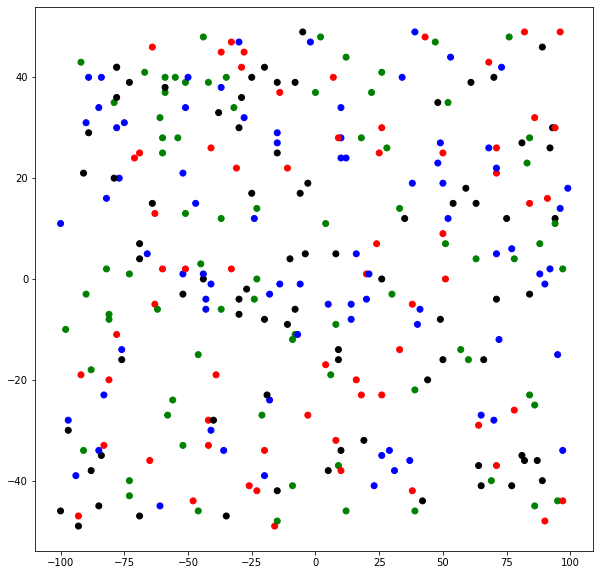

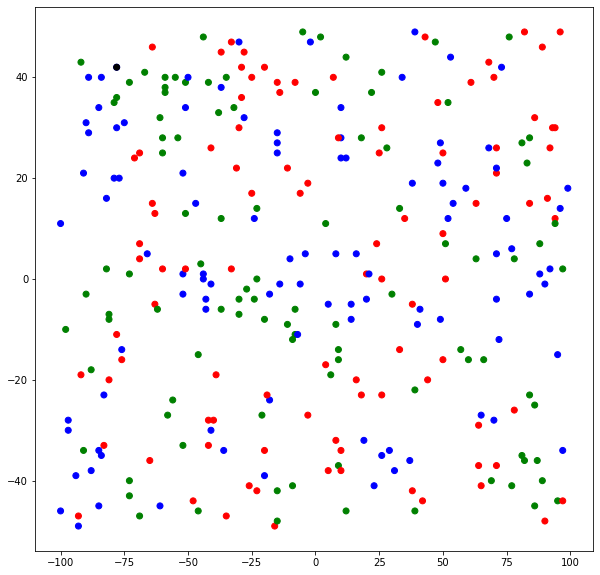

In [78]:
show_data(points)
KNN(points, k)
show_data(points)